In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


data = pd.read_csv("spotify-2023.csv")

In [13]:
#artists = data['artist(s)_name'].transform(lambda x : x.split(','))
artists = data['artist(s)_name'].apply(lambda x: x.split(','))
artists = artists[artists.apply(lambda x : len(x) > 1)]

te = TransactionEncoder()
te_data = te.fit(artists).transform(artists)

encoded_data = pd.DataFrame(te_data, columns=te.columns_)
frequent_itemsets = apriori(encoded_data, min_support=0.005, use_colnames=True)

print(frequent_itemsets.head(100))

     support                 itemsets
0   0.005464             ( 070 Shake)
1   0.035519             ( 21 Savage)
2   0.005464  ( Amitabh Bhattacharya)
3   0.005464           ( Ana Castela)
4   0.005464        ( Anderson .Paak)
..       ...                      ...
95  0.005464           (Daddy Yankee)
96  0.008197           (David Guetta)
97  0.005464           (De La Ghetto)
98  0.008197                (Dr. Dre)
99  0.040984                  (Drake)

[100 rows x 2 columns]


In [23]:
rules = association_rules(df=frequent_itemsets, metric="confidence", min_threshold=0.1, num_itemsets=1)

filtered_rules = rules[(rules['antecedents'].map(len) > 1) & 
                       (rules['consequents'].map(len) == 1)]

filtered_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
92,"( Anderson .Paak, Bruno Mars)",( Silk Sonic),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
93,"( Anderson .Paak, Silk Sonic)",(Bruno Mars),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
94,"( Silk Sonic, Bruno Mars)",( Anderson .Paak),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
98,"( DJ Luian, Anuel Aa)",(Mambo Kingz),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
99,"( DJ Luian, Mambo Kingz)",( Anuel Aa),0.005464,0.008197,0.005464,1.0,122.0,1.0,0.005420,inf,0.997253,0.666667,1.0,0.833333
100,"( Anuel Aa, Mambo Kingz)",( DJ Luian),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
104,"(Imagine Dragons, Arcane)",( League of Legends),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
105,"(Imagine Dragons, League of Legends)",( Arcane),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
106,"( League of Legends, Arcane)",(Imagine Dragons),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000
110,"( Kumaar, Vishal Dadlani)",( Shekhar Ravjiani),0.005464,0.005464,0.005464,1.0,183.0,1.0,0.005435,inf,1.000000,1.000000,1.0,1.000000


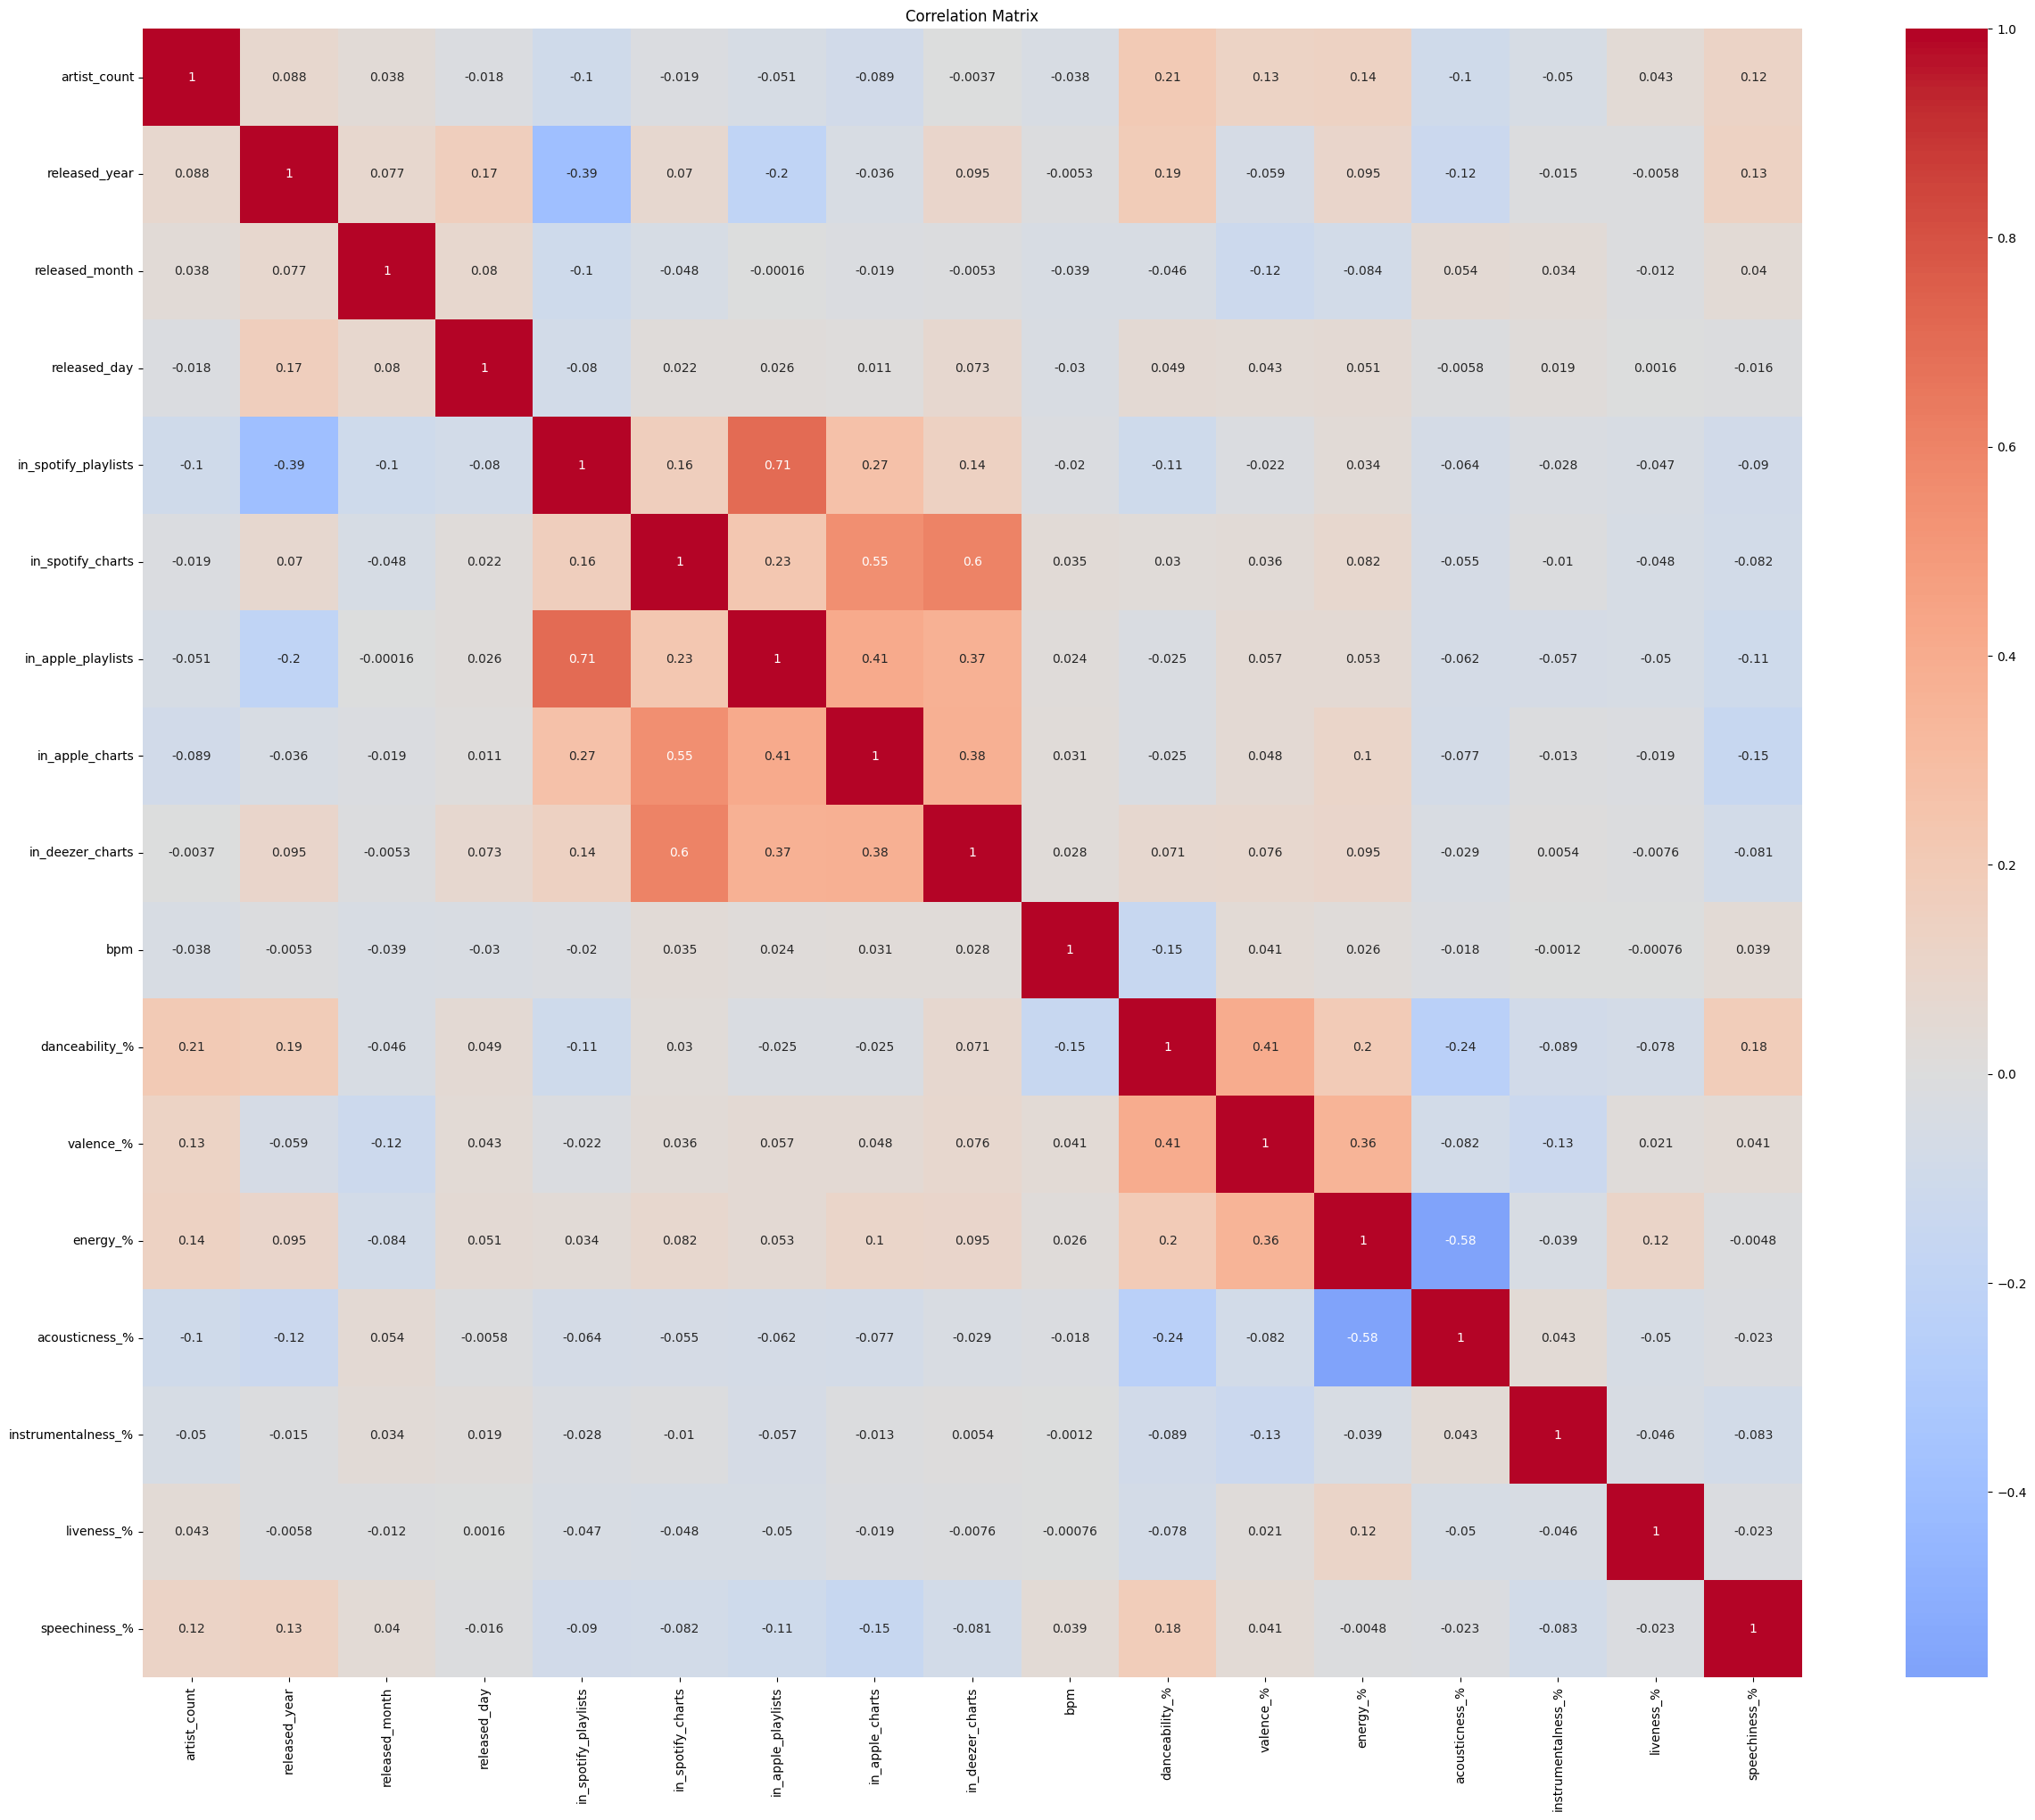

In [7]:
# Correlation Matrix ( Numeric Only )
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 3)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [26]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).head(20))

in_spotify_playlists  in_apple_playlists    0.708277
in_spotify_charts     in_deezer_charts      0.600205
                      in_apple_charts       0.552232
in_apple_playlists    in_apple_charts       0.414523
danceability_%        valence_%             0.408451
in_apple_charts       in_deezer_charts      0.383668
in_apple_playlists    in_deezer_charts      0.369032
valence_%             energy_%              0.357612
in_spotify_playlists  in_apple_charts       0.271317
in_spotify_charts     in_apple_playlists    0.233354
artist_count          danceability_%        0.207027
danceability_%        energy_%              0.198095
released_year         danceability_%        0.187333
danceability_%        speechiness_%         0.184977
released_year         released_day          0.174282
in_spotify_playlists  in_spotify_charts     0.164331
                      in_deezer_charts      0.144342
artist_count          energy_%              0.137096
released_year         speechiness_%         0.

In [5]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).tail(10))

in_apple_playlists  speechiness_%          -0.108011
released_month      valence_%              -0.118571
released_year       acousticness_%         -0.124156
valence_%           instrumentalness_%     -0.132890
bpm                 danceability_%         -0.147095
in_apple_charts     speechiness_%          -0.151539
released_year       in_apple_playlists     -0.198998
danceability_%      acousticness_%         -0.236165
released_year       in_spotify_playlists   -0.392204
energy_%            acousticness_%         -0.577344
dtype: float64

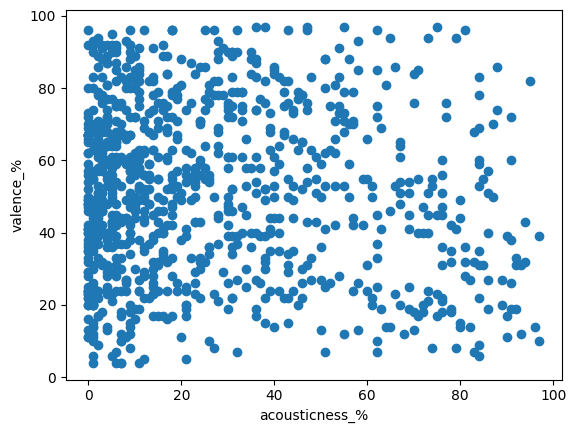

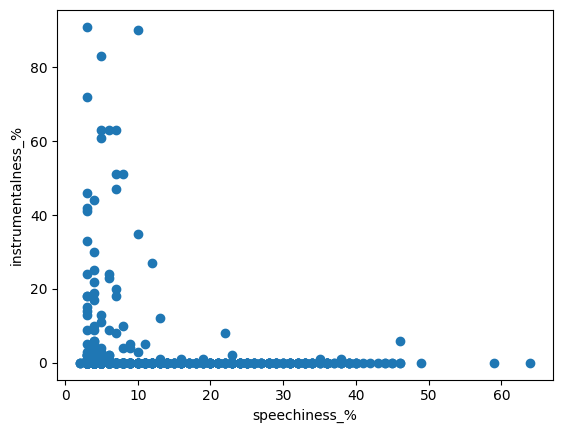

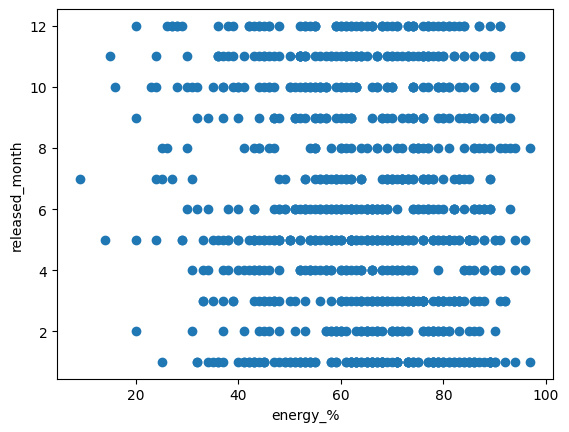

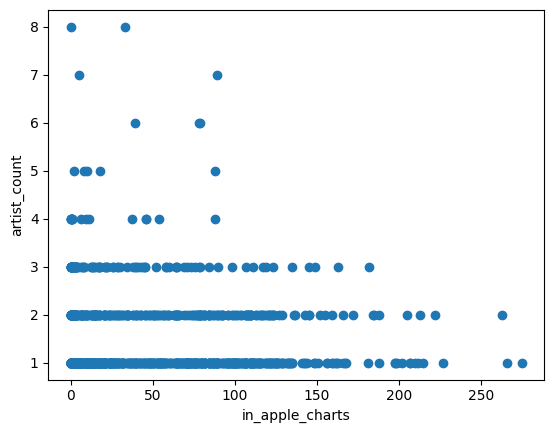

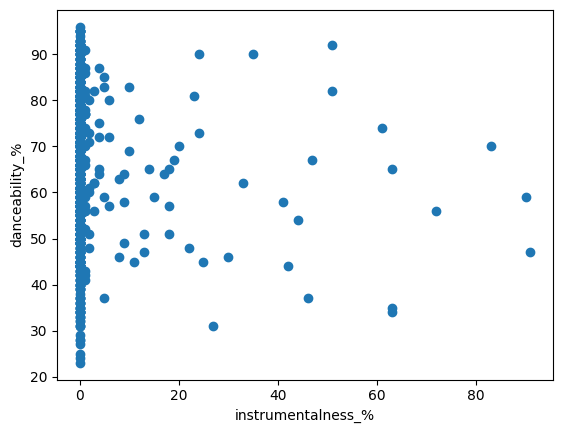

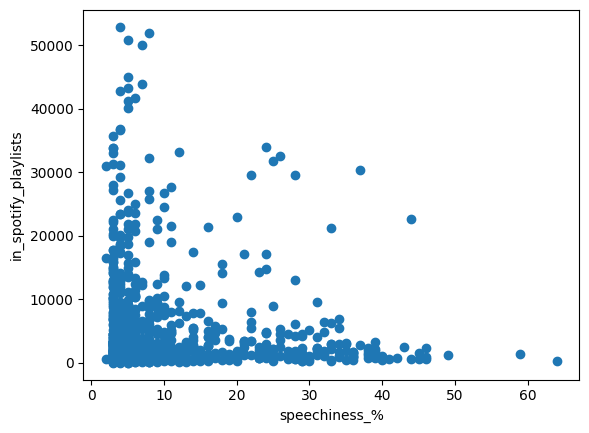

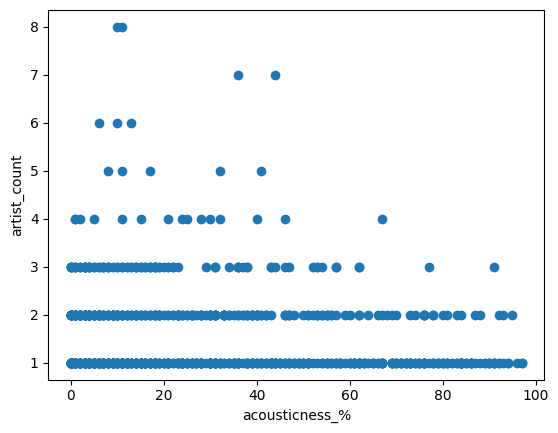

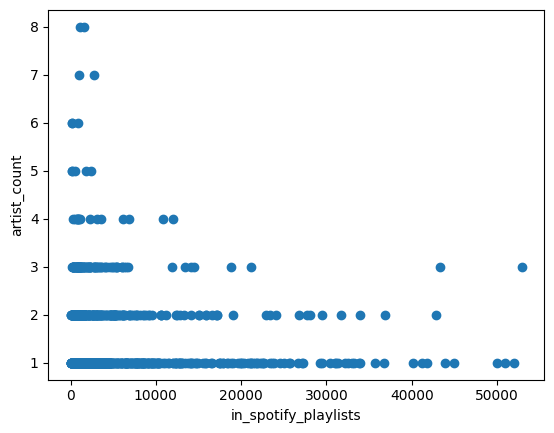

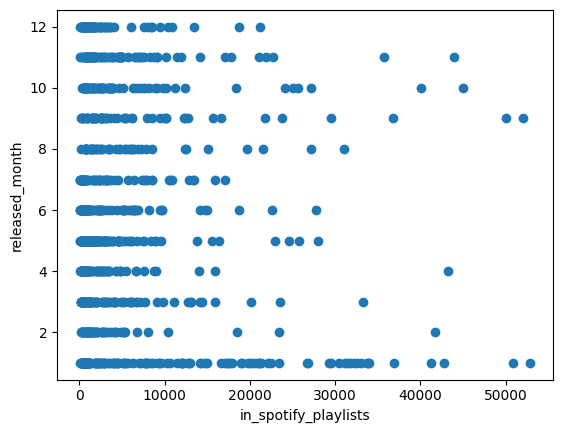

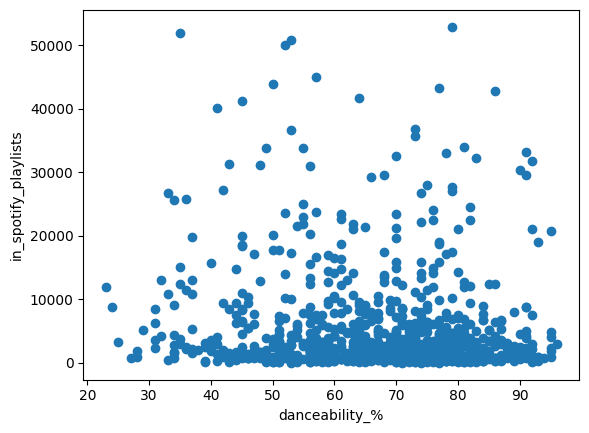

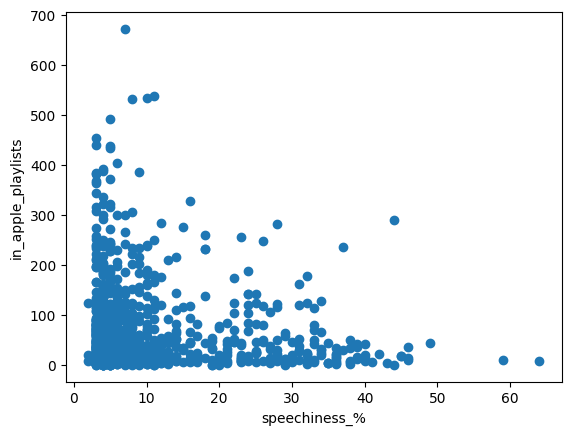

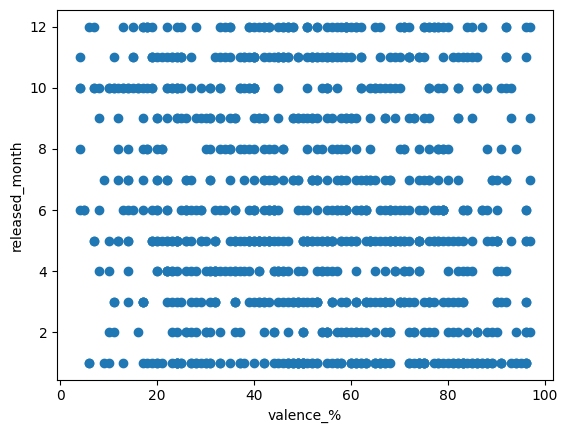

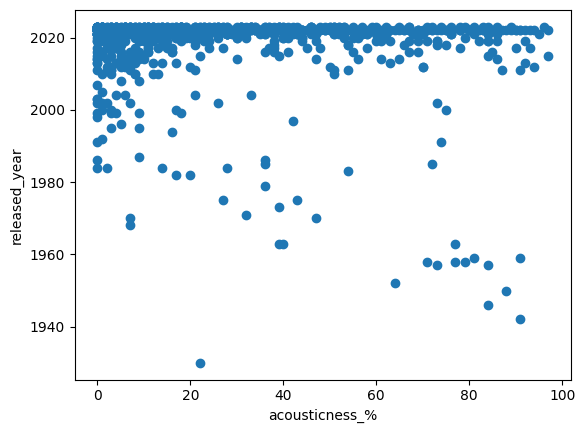

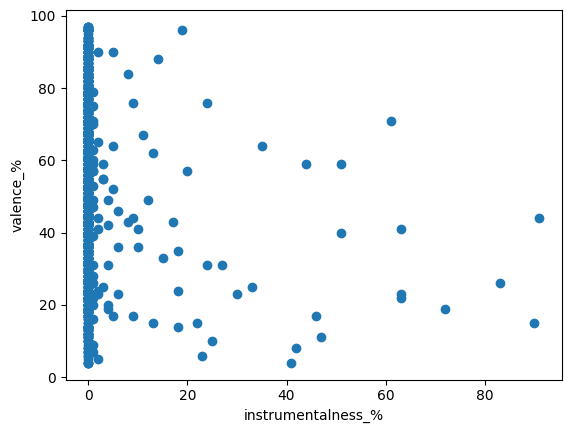

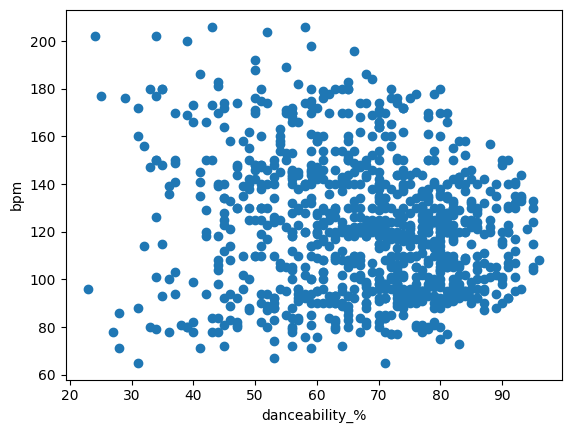

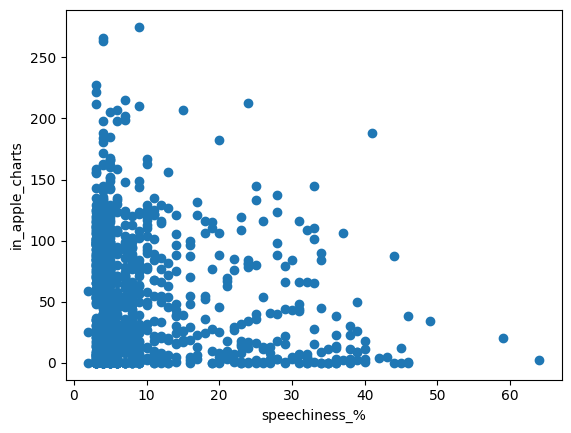

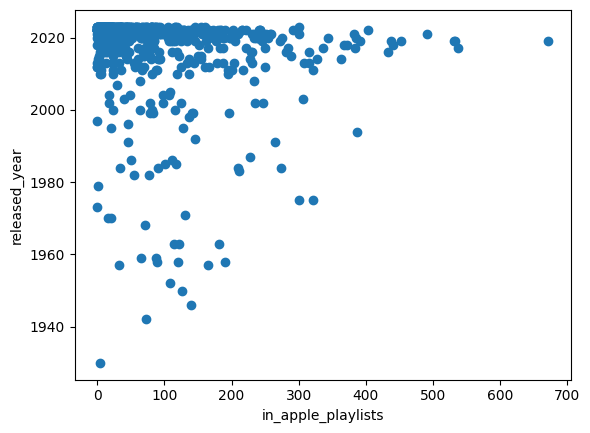

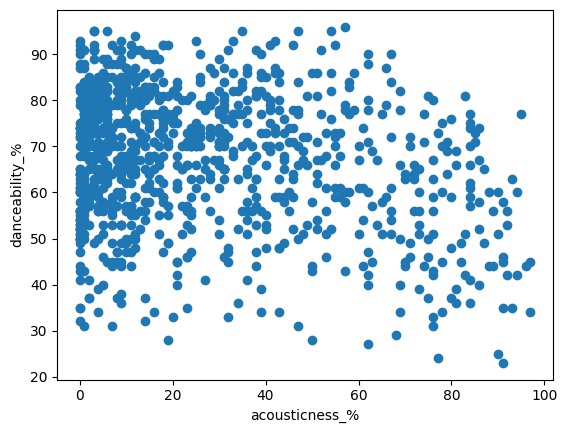

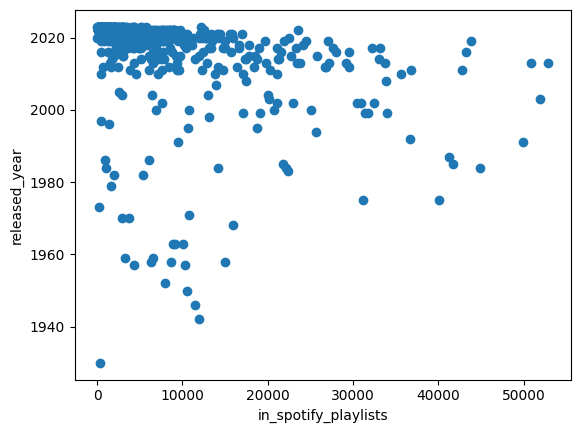

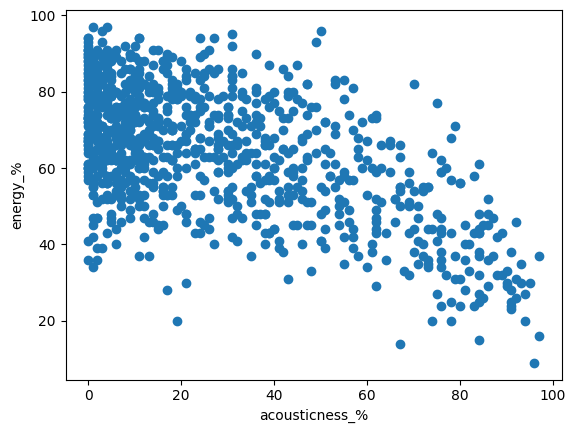

In [37]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(30)
inv_sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).tail(20)

top_pairs = [pair for pair in sorted_pairs.index]
inv_top_pairs = [pair for pair in inv_sorted_pairs.index]

for (var2, var1) in inv_top_pairs:
    plt.scatter(data[var2], data[var1])
    plt.xlabel(var2)
    plt.ylabel(var1)
    # plt.title('Simple Scatterplot')
    plt.show()
    continue

    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()